In [158]:
!pip install googlesearch-python


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [159]:
!pip install seaborn --upgrade


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [160]:
!pip install xgboost


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [161]:
!pip install geopy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [162]:
!pip install scrapy


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [163]:
%pip install --upgrade bs4


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [164]:
%pip install --upgrade lxml


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [165]:
!pip install requests


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [234]:
from bs4 import BeautifulSoup
from IPython.display import HTML
import scrapy
from scrapy.crawler import CrawlerProcess
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
from sqlalchemy import create_engine
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
import folium
import re
from sympy import symbols, Eq, solve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import networkx as nx
from geopandas.tools import geocode
from geopy.exc import GeocoderTimedOut
import csv

# What is the best city?

### В нашем проекте мы будем исследовать города и страны. Мы посмотрим на разные характеристики такие как уровень цен, зарплат, стоимость недвижимости и продуктов в магазине и на основе этих факторов сделаем вывод о том, какой город (или города) – самый лучший. Мы также научимся по стоимости определенного набора продуктов предсказывать цены на кофе в разных городах (поскольку автор этого проекта kindа of obsessed with coffe). 

### Отметим практическую полезность этого проекта: в связи со сложившейся геополитической ситуацией, некоторые люди думают об эмиграции и им важно знать, какие города им подходят и не подходят и почему. 

### Stay tuned! and follow my research...

1) Работа с REST API (XML/JSON) – мы будем загружать данные о зарплатах в разных городах с сайта"https://api.teleport.org/api/urban_areas/", используя API

2) Веб-скреппинг – мы будем загражать данные по странам через Scrapy (см приложенный питоновский файл и полученный выходной файл с данными). Для каких-то локальных маленьких задач, где использование Scrapy излишне, будем пользоваться библиотекой Beautiful Soup

3) Pandas будем пользоваться активно для группировки и трансформации данных

4) Регулярные выражения будем использовать для поиска по сайту определнных паттернов (в нашей задаче будем искать на сайте лучшие города – паттерн "1. {какой-то город}")

5) Математическими возможностями Python будем пользоваться для того, чтобы рассчитать ежемесячный плятеж по ипотеке и сравнить города таким образом. Также посчитаем Housing Affordability для каждого города.

6) Геоданными будем пользоваться для того, чтобы наглядно изобразить на карте города и раскрасить их в зависимости от среднего уровня зарплат. Также будем пользоваться ими для получения координат стран и определния их континента соответственно 

7) Нарисуем граф, в котором будут ребрами соединены страны, расположенные на одном континенте. Подпишем компоненты свзности и в каждой найдем страну, у которой Cost of Living наибольший. 

8) Визуализировать будем.

9) SQL воспользуемся для упрощенных запросов к таблице и узнаем, в каких городах самый дорогой кофе

10) На stremlit проект загрузим

11) Машинное обучение будет использоваться для предсказание цен на кофе, если известны цены на молоко, воду, пиво, поход в ресторан и жилье в городе

12) 

Если бы вас спросили, какой город самый лучший, что бы вы сделали в первую очередь? Автор этого проекта решил сильно не напрягаться, ввел в гугл "What is the best city in the world?" и перешел по самой первой ссылке:

In [235]:
# Получим содержимого страницы
response = requests.get('https://www.worldsbestcities.com/rankings/worlds-best-cities/')
soup = BeautifulSoup(response.content, 'html.parser')

# Извлечем текст
text = soup.get_text()

# Найдем города с помощью регулярного выражения
pattern = r'Download Full Report\s+\d\.\s+([A-Za-z\s]*?)(?=\s[^A-Za-z])'
best_cities = re.findall(pattern, soup_text)

# Напечатаем первые 10 городов
print(best_cities[:10])

['London', 'Paris', 'New York', 'Tokyo', 'Dubai', 'Barcelona', 'Rome', 'Madrid', 'Singapore']


Теперь проведем собственное исследование. Начнем издалека – сравним старны.

C сайта (https://www.numbeo.com/cost-of-living/rankings_by_country.jsp) скачаем данные о странах. Мы сделаем это с помощью библиотеки scrapy, которую запустим локально на компьютере. Код можно посмотреть в дополнительном приложенном файле.

Обзор индексов стоимости жизни на этом сайте: Индексы стоимости жизни, представленные на этом сайте, относятся к Нью-Йорку (NYC), при этом базовый индекс для NYC составляет 100%. Ниже приводится описание каждого индекса и его значение:

1) Cost of Living Index: Этот индекс показывает относительные цены на потребительские товары, такие как продукты питания, рестораны, транспорт и коммунальные услуги. Он не учитывает расходы на проживание, такие как арендная плата или ипотека. Например, город с индексом стоимости жизни 120 оценивается как на 20% более дорогой, чем Нью-Йорк (без учета арендной платы). 

2) Rent Index: Этот индекс оценивает цены на аренду квартир в городе по сравнению с Нью-Йорком. Если индекс арендной платы равен 80, это означает, что средние цены на аренду жилья в этом городе примерно на 20% ниже, чем в Нью-Йорке.

3) Groceries Index: Этот индекс дает оценку цен на продукты питания в городе по сравнению с Нью-Йорком. Numbeo использует весовые коэффициенты товаров из раздела "Рынки" для расчета этого индекса для каждого города.

4) Restaurant Price Index: Этот индекс сравнивает цены на блюда и напитки в ресторанах и барах с ценами в Нью-Йорке.

5) Cost of Living Plus Rent Index: Этот индекс оценивает цены на потребительские товары, включая арендную плату, в сравнении с ценами в Нью-Йорке.

6) Local Purchasing Power Index: Этот индекс показывает относительную покупательную способность в данном городе на основе средней чистой заработной платы. Местная покупательная способность на уровне 40 означает, что жители города со средней зарплатой могут позволить себе в среднем на 60% меньше товаров и услуг по сравнению с жителями Нью-Йорка со средней зарплатой.

In [237]:
df = pd.read_csv('numbeo_data.csv')
df['Country'] = df['Country'].replace('United States', 'United States of America')
print(df['Cost of Living Plus Rent Index'].min())
print(df['Cost of Living Plus Rent Index'].max())

11.0
120.0


Какой огромный разброс в стоимости жизни!

In [238]:
df.head()

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Bermuda,141.8,96.3,120.0,143.3,142.0,79.5
1,Switzerland,114.2,50.2,83.5,113.9,109.5,118.7
2,Cayman Islands,103.4,75.7,90.1,96.4,92.4,76.7
3,Bahamas,90.9,39.6,66.3,74.1,94.8,43.2
4,Barbados,88.8,21.2,56.4,80.1,82.7,36.8


Теперь для каждого континента найдем страну, в которой самый дорогой уровень жизни и построим граф:

In [239]:
# Функция для геокодирования с повторными попытками в случае таймаута
def geocode_with_timeout(country):
    try:
        return geocode(country).geometry
    except GeocoderTimedOut:
        return geocode_with_timeout(country)

# Загружаем данные о географическом положении стран
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Геокодируем каждую страну, чтобы получить её координаты
df['geometry'] = df['Country'].apply(geocode_with_timeout)

# Преобразуем датафрейм pandas в GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Определяем континент каждой страны
gdf = gpd.sjoin(gdf, world, how="left", op='intersects')
gdf['Continent'] = gdf['continent']
gdf.loc[gdf['Country'] == 'Switzerland', 'Continent'] = 'Europe' # При определении координат происходит ошибка, поэтому нужно вручную добавить информацию

# Удаляем страны, для которых не удалось определить континент
gdf = gdf.dropna(subset=['Continent'])

# Создаем граф
G = nx.Graph()

for _, country in gdf.iterrows():
    G.add_node(country['Country'], continent=country['Continent'], cost_of_living=country['Cost of Living Index'])

for continent in gdf['Continent'].unique():
    countries_in_continent = gdf[gdf['Continent'] == continent]['Country']
    for i, country1 in enumerate(countries_in_continent):
        for country2 in countries_in_continent[i + 1:]:
            G.add_edge(country1, country2)

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/1016085441.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/1016085441.py:18: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  gdf = gpd.sjoin(gd

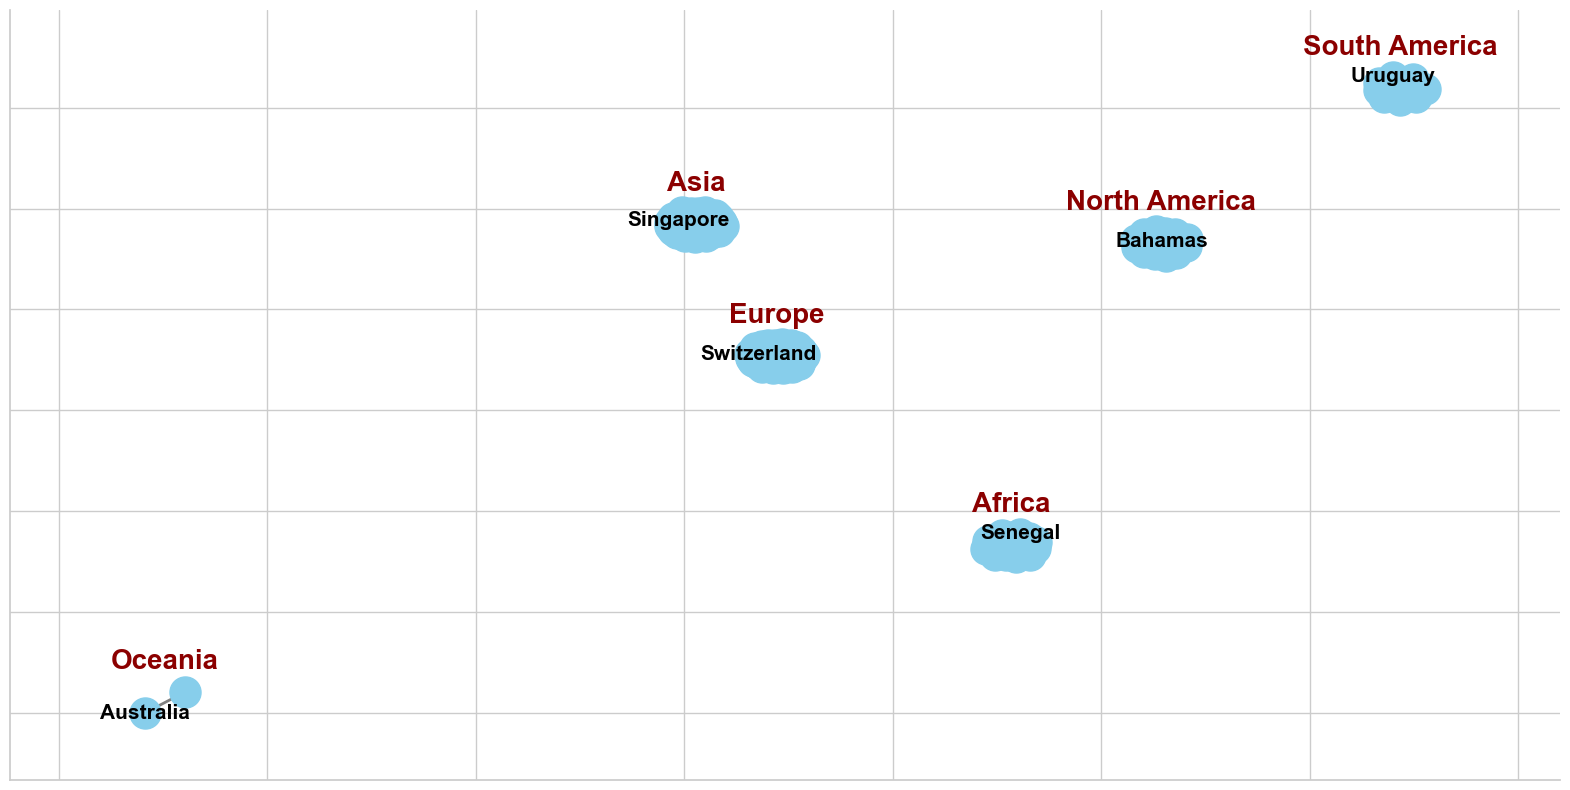

In [240]:
# Получаем позиции узлов при помощи алгоритма spring layout
pos = nx.spring_layout(G, seed=42)

# Устанавливаем размер фигуры
plt.figure(figsize=(20, 10))

# Рисуем узлы графа
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')

# Рисуем ребра графа
nx.draw_networkx_edges(G, pos, width=2, edge_color='grey')

# Находим страну с наибольшим индексом стоимости жизни для каждого континента
max_cost_of_living_countries = gdf.loc[gdf.groupby('Continent')['Cost of Living Index'].idxmax()]['Country']

# Рисуем подписи только для стран с наибольшим индексом стоимости жизни
labels = {country: country for country in max_cost_of_living_countries}
nx.draw_networkx_labels(G, pos, labels, font_size=15, font_weight='bold')

# Рисуем подписи для каждого континента
continent_labels = {continent: continent for continent in gdf['Continent'].unique()}
continent_positions = {continent: sum(pos[country] for country in G.nodes if G.nodes[country]['continent'] == continent) / sum(G.nodes[country]['continent'] == continent for country in G.nodes) for continent in continent_labels}

# Смещение для подписей континентов
for continent in continent_positions:
    continent_positions[continent][1] += 0.1

nx.draw_networkx_labels(G, continent_positions, continent_labels, font_size=20, font_color='darkred', font_weight='bold')

plt.show()

#### Промежуточный вывод: если вы определились с континентом для переезда, и при этом не хотите вести дорогой образ жизни, то из списка стран стоит вычернуть те, которые представлены выше.

Интересно было бы получить более подробную информацию, поэтому раскрасим на карте страны в зависимости от Cost of Living Plus Rent Index. 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/1486273171.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


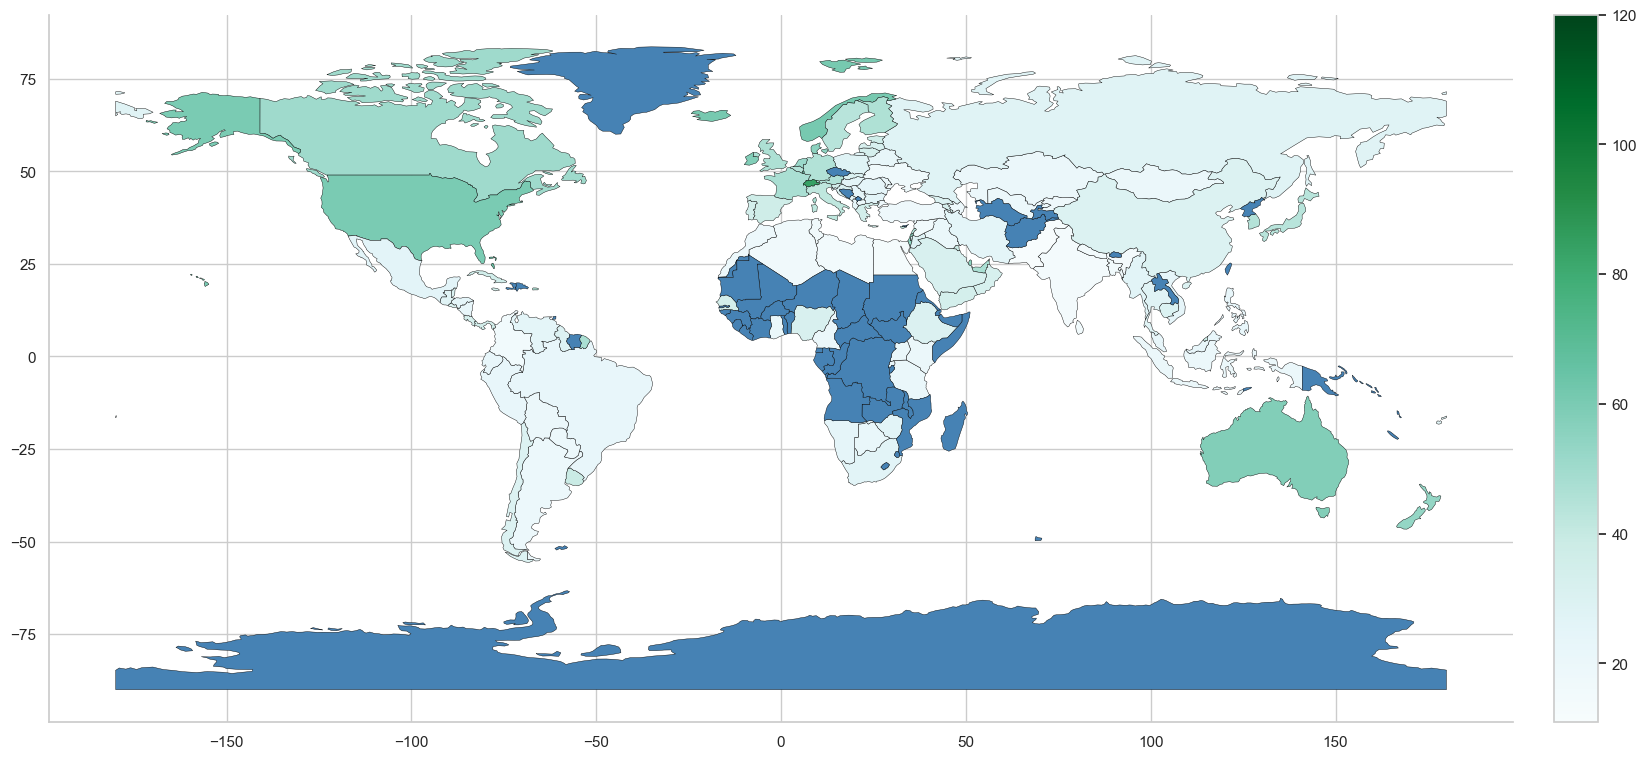

In [241]:
df = pd.read_csv('numbeo_data.csv')
df['Country'] = df['Country'].replace('United States', 'United States of America')
# Загрузите геоданные мира
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Слияние данных с геоданными
merged = world.set_index('name').join(df.set_index('Country'))
# Подготовка карты
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.4)

# Рисуем карту
merged.plot(column='Cost of Living Plus Rent Index', 
            cmap='BuGn', 
            linewidth=0.3, 
            ax=ax, 
            edgecolor='0', 
            legend=True, 
            cax=cax,
            vmin = df['Cost of Living Plus Rent Index'].min(),
            vmax = df['Cost of Living Plus Rent Index'].max(),
            missing_kwds={'color': 'steelblue'})
plt.show()


In [242]:
# Выведем названия стран, которые есть в 'world', но отсутствуют в 'df' (они закрашены голубым)
missing_countries_in_df = set(world['name']) - set(df['Country'])
print("Countries present in 'world' but missing in 'df':", missing_countries_in_df)

Countries present in 'world' but missing in 'df': {'Bosnia and Herz.', 'Malawi', 'Eritrea', 'Taiwan', 'Czechia', 'Sierra Leone', 'Guinea', 'Haiti', 'Suriname', 'Mauritania', 'Vanuatu', 'Liberia', 'Benin', 'Dominican Rep.', 'Turkmenistan', "Côte d'Ivoire", 'Madagascar', 'Guinea-Bissau', 'Niger', 'N. Cyprus', 'Somalia', 'Mali', 'S. Sudan', 'Bhutan', 'eSwatini', 'Gambia', 'Papua New Guinea', 'Falkland Is.', 'Solomon Is.', 'Eq. Guinea', 'Zambia', 'New Caledonia', 'Sudan', 'Dem. Rep. Congo', 'Trinidad and Tobago', 'Tajikistan', 'Antarctica', 'W. Sahara', 'Fr. S. Antarctic Lands', 'Angola', 'Congo', 'Gabon', 'Somaliland', 'North Korea', 'Togo', 'Central African Rep.', 'Kosovo', 'Burundi', 'Laos', 'Burkina Faso', 'Greenland', 'Chad', 'Lesotho', 'Timor-Leste', 'Djibouti', 'Afghanistan', 'Mozambique'}


Теперь посмотрим на корреляции между Cost of Living, Rent Index, Restaurant Index Grocery Index и остальными. Предположение заключается в том, что Cost of Living сильнее зависит от Rent Index, чем от Grocery Index.

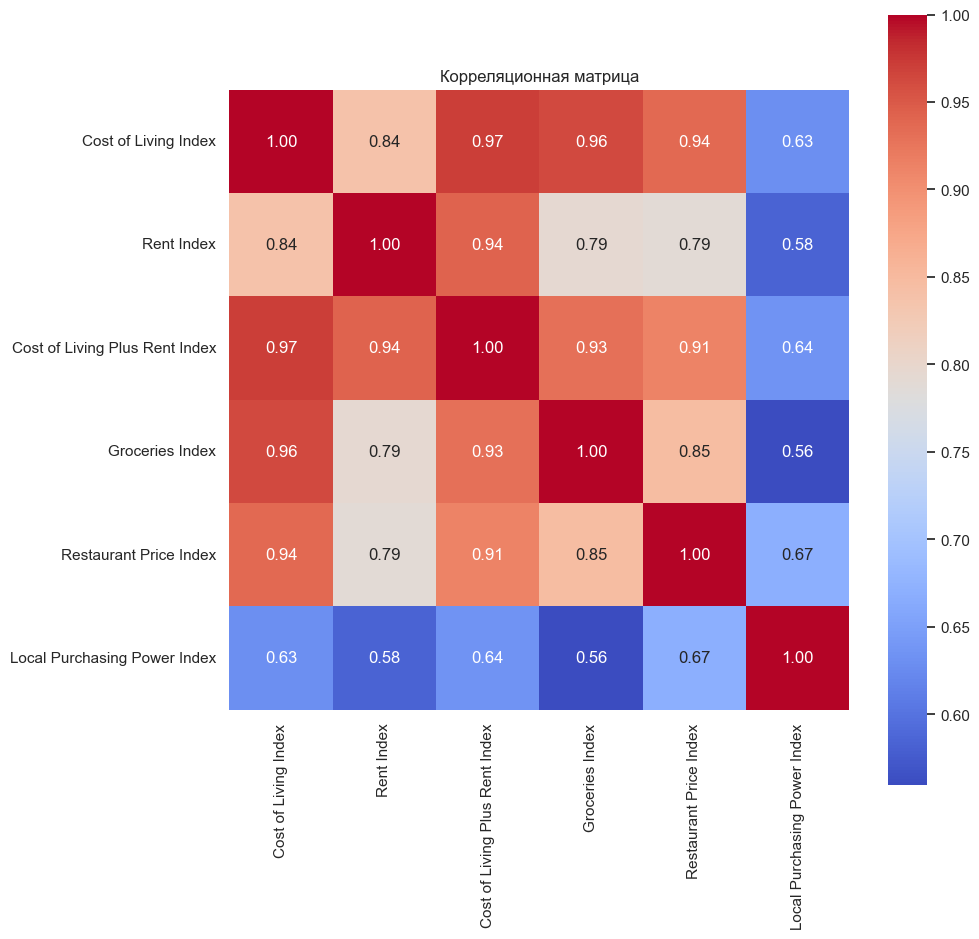

In [243]:
corr = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Корреляционная матрица')
plt.show()

Посмотрим на связь между Cost of Living Index и Local Purchasing Power Index. 

<AxesSubplot: xlabel='Cost of Living Index', ylabel='Local Purchasing Power Index'>

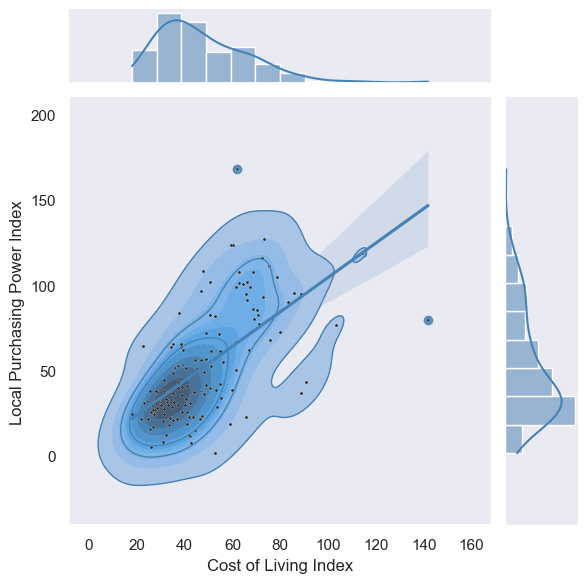

In [247]:
sns.set_theme(style="dark", palette=None)
sns.color_palette("icefire", as_cmap=True)

g = sns.jointplot(data=df, x="Cost of Living Index", y="Local Purchasing Power Index", color="steelblue", kind="reg")
g.plot_joint(sns.kdeplot, fill=True, color="steelblue")
sns.scatterplot(data=df, x="Cost of Living Index", y="Local Purchasing Power Index", s=5, color=".15")
sns.kdeplot(data=df, x="Cost of Living Index", y="Local Purchasing Power Index", levels=5, color="steelblue", linewidths=1)

#### Видим, что в основном, чем ниже покупательная способность валюты, тем ниже стоимость жизни. В каком-то смысле, это означает, что стоит переезжать в страны со слабыми валютами, если хочется дешево жить. Правда это палка о двух концах – ведь в таких странах вы и зарабатывать будете меньше. Отметим также, что в основном пик стоимости жизни приходится на 30, то есть у стоимость жизни в наибольшем числа стран на 70% ниже, чем в Нью-Йорке. Покупательная способность у наибольшего числа стран на 60% ниже доллара.

Проверим нашу гипотезу о том, что стоимость жизни больше зависит от стоимости жилья нежеле чем от стоимости товаров.

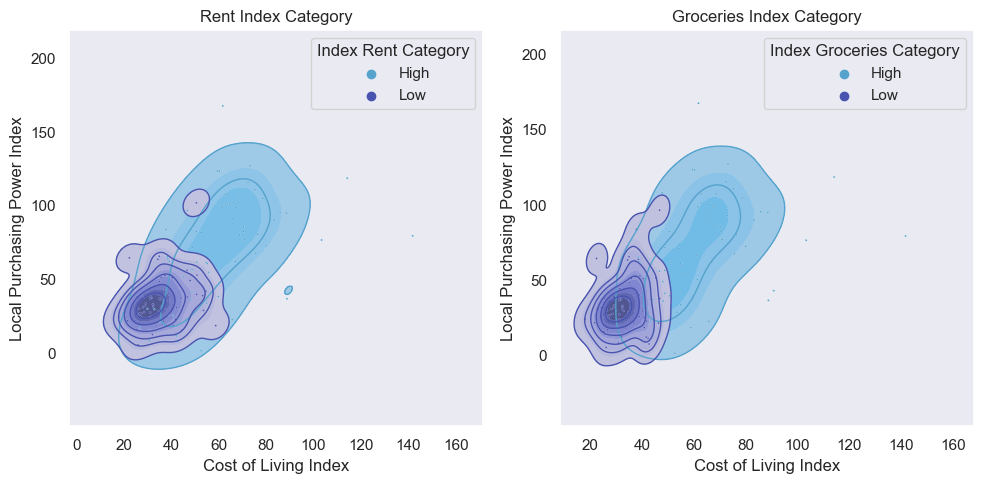

In [252]:
# Добавляем новый столбец 'Index Category'
sns.set_theme(style="dark", palette='icefire')
sns.color_palette("icefire", as_cmap=True)
df['Index Rent Category'] = df['Rent Index'].apply(lambda x: 'High' if x > df['Rent Index'].median() else 'Low')
df['Index Groceries Category'] = df['Groceries Index'].apply(lambda x: 'High' if x > df['Groceries Index'].median() else 'Low')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(ax=ax[0], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Rent Category", fill=True, color="steelblue")
sns.kdeplot(ax=ax[0], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Rent Category", levels=7, color="b", linewidths=1)
sns.scatterplot(ax=ax[0], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Rent Category", s=2, color=".15")
sns.kdeplot(ax=ax[1], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Groceries Category", fill=True)
sns.kdeplot(ax=ax[1], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Groceries Category", levels=7, color="b", linewidths=1)
sns.scatterplot(ax=ax[1], data=df, x="Cost of Living Index", y="Local Purchasing Power Index", hue="Index Groceries Category", s=2, color=".15")

ax[0].set_title("Rent Index Category")
ax[1].set_title("Groceries Index Category")

plt.tight_layout()
plt.show()


Видим, что разницы почти нет. Это достаточно логичный вывод, потому что важна относительная стоимость товаров, а не реальная: отношение цены квартиры к цене кофе различатся от сраны к стране, но находится в определнном промежутке (это также происходит потому что арбитраж возможен только какое-то непродолжительное время, и деньги с неба не падают). Видим, что страны с высокими индексами аренды и товаров гораздо более плавно распределены. 

### Один из самых важных вопросов при переезде – вопрос зарплаты. Изучим его.

Для этого при помощи API скачаем данные о зарплатах с сайта https://api.teleport.org/api/urban_areas/. 

In [253]:
# Запрос списка городских зон
url = "https://api.teleport.org/api/urban_areas/"
response = requests.get(url)
data = response.json()

# Извлечение ссылок на городские зоны
urban_areas = data['_links']['ua:item']
urban_area_links = [item['href'] for item in urban_areas]

# Создаем пустой датафрейм для сбора информации о зарплатах
df_salaries = pd.DataFrame()

for link in urban_area_links:
    # Запрос данных о зарплатах
    salary_url = link + 'salaries/'
    response = requests.get(salary_url)
    salary_data = response.json()
    
    if 'salaries' in salary_data:
        # Преобразуем данные о зарплатах в датафрейм
        salary_df = pd.json_normalize(salary_data['salaries'])
        
        # Добавим название городской зоны для каждого набора данных о зарплатах
        salary_df['urban_area'] = link.split('/')[-2]  # Извлечение имени городской зоны из ссылки

        df_salaries = df_salaries.append(salary_df, ignore_index=True)
        
df_salaries['urban_area'] = df_salaries['urban_area'].astype(str)
df_salaries['urban_area'] = df_salaries['urban_area'].apply(lambda x: x.replace('slug:', '').strip())

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from 

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_salaries = df_salaries.append(salary_df, ignore_index=True)
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/886120511.py:26: FutureWarning: The frame.append method is deprecated and will be removed from 

In [254]:
df_salaries.tail()

,job.id,job.title,salary_percentiles.percentile_25,salary_percentiles.percentile_50,salary_percentiles.percentile_75,urban_area
13827,TEACHER,Teacher,47558.835896,62079.508647,81033.635943,zurich
13828,UX-DESIGNER,UX Designer,57051.828525,69953.967157,85773.894501,zurich
13829,WAITER,Waiter,31893.102141,43889.758734,60398.982614,zurich
13830,WEB-DESIGNER,Web Designer,55648.830068,76413.016652,104924.921273,zurich
13831,WEB-DEVELOPER,Web Developer,61189.321082,78944.860771,101852.593426,zurich


Если переезжает семья, то для того, чтобы оба могли работать, нужно, чтобы эта работа для обоих была, причем достойная! Посмотрим на рапределение зарплат внутри профессий.

In [255]:
df_salaries['average_salary'] = df_salaries[['salary_percentiles.percentile_25', 
                           'salary_percentiles.percentile_50', 
                           'salary_percentiles.percentile_75']].mean(axis=1)

average_salaries = df_salaries.groupby('urban_area')['average_salary'].mean()

In [256]:
df_salaries['range'] = df_salaries['salary_percentiles.percentile_75'] - df_salaries['salary_percentiles.percentile_25']

# создаем новые столбцы с наибольшим и наименьшим размахом зарплат для каждой профессии
df_salaries['max_range'] = df_salaries.groupby('job.title')['range'].transform('max')
df_salaries['min_range'] = df_salaries.groupby('job.title')['range'].transform('min')

# сортируем по максимальному и минимальному размаху и выводим первые пять профессий
top_5_titles = df_salaries.sort_values('max_range', ascending=False)['job.title'].drop_duplicates()[:5]
bottom_5_titles = df_salaries.sort_values('min_range')['job.title'].drop_duplicates()[:5]

top_5_urban_area = df_salaries.loc[df_salaries['max_range'].nlargest(5).index, 'urban_area'].unique()
bottom_5_urban_area = df_salaries.loc[df_salaries['min_range'].nsmallest(5).index, 'urban_area'].unique()

# создаем списки из полученных профессий
top_5_titles = top_5_titles.tolist()
bottom_5_titles = bottom_5_titles.tolist()

print("Высокий разброс зарплат:")
for title in top_5_titles:
    df_title = df_salaries[df_salaries['job.title'] == title]
    max_salary_location = df_title['urban_area'][df_title['salary_percentiles.percentile_50'].idxmax()]
    min_salary_location = df_title['urban_area'][df_title['salary_percentiles.percentile_50'].idxmin()]
    print(f"Для профессии {title}, максимальная зарплата в {max_salary_location}, минимальная зарплата в {min_salary_location}")

print("\nНизкий разброс зарплат:")
for title in bottom_5_titles:
    df_title = df_salaries[df_salaries['job.title'] == title]
    max_salary_location = df_title['urban_area'][df_title['salary_percentiles.percentile_50'].idxmax()]
    min_salary_location = df_title['urban_area'][df_title['salary_percentiles.percentile_50'].idxmin()]
    print(f"Для профессии {title}, максимальная зарплата в {max_salary_location}, минимальная зарплата в {min_salary_location}")


Высокий разброс зарплат:
Для профессии C Level Executive, максимальная зарплата в riyadh, минимальная зарплата в havana
Для профессии Finance Manager, максимальная зарплата в zurich, минимальная зарплата в havana
Для профессии Attorney, максимальная зарплата в hong-kong, минимальная зарплата в havana
Для профессии Electrical Engineer, максимальная зарплата в palo-alto, минимальная зарплата в havana
Для профессии Business Development, максимальная зарплата в boulder, минимальная зарплата в havana

Низкий разброс зарплат:
Для профессии Postdoctoral Researcher, максимальная зарплата в zurich, минимальная зарплата в havana
Для профессии Receptionist, максимальная зарплата в aarhus, минимальная зарплата в havana
Для профессии Cashier, максимальная зарплата в aarhus, минимальная зарплата в havana
Для профессии Administrative Assistant, максимальная зарплата в hong-kong, минимальная зарплата в havana
Для профессии Nurse, максимальная зарплата в palo-alto, минимальная зарплата в havana


#### Кажется, переезжать в Havana не самая лучшая идея :)

С помощью карт получим более широкую картину. (Кстати, на этой карте можно наводить и смотреть среднюю зарплату для каждого конкретного города – попробуйте. Зарплаты указаны в долларах.)

In [257]:
# Инициализация геолокатора
geolocator = Nominatim(user_agent="myGeocoder")

# Нормализация зарплат
norm = colors.Normalize(vmin=average_salaries.min(), vmax=average_salaries.max())
# Создаем цветовую карту
colormap = cm.get_cmap("YlOrRd")

# Создаем карту
m = folium.Map(location=[46.8182, 8.2275], zoom_start=7)

# Добавляем маркеры для каждого города
for idx, row in average_salaries.reset_index().iterrows():
    # Получаем координаты города
    location = geolocator.geocode(row['urban_area'])
    
    # Если координаты не найдены, пропускаем итерацию
    if not location:
        continue

    # Создаем цвет на основе нормализованной средней зарплаты
    rgb_color = colormap(norm(row['average_salary']))[:3]
    hex_color = colors.rgb2hex(rgb_color)
    
    # Добавляем круглый маркер на карту
    folium.CircleMarker(
        location=[location.latitude, location.longitude],
        radius=10,
        popup=row['urban_area'] + ': $' + str(round(row['average_salary'], 2)),
        color=hex_color,
        fill=True,
        fill_color=hex_color
    ).add_to(m)

# Выводим карту
m


#### Если хочется много зарабатывать, поехать в Америку – отличная идея. В Европе по уровню зарплат лидирует Цюрих.

### Сторона расходов. Жилье

Теперь обратимся к стороне трат и изучим подробнее стоимости товаров и жилья. C того же сайта numbeo скачаем данные о товарах для тех городов, для которых они есть, удаляя города, которые нужно было бы обрабатывать вручную. (Мы просто скопируем список городов вручную и сохраним в csv файл.)

In [259]:
cities = []
with open('cities.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)  # Пропускаем заголовок, если он есть
    for row in reader:
        row[0] = row[0].replace(' ', '-')
        if (row[0] == 'Kiev-(Kyiv)'):
            row[0] = 'Kiev'
        if (row[0] == 'Krakow-(Cracow)'):
            row[0] = 'Krakow'
        if (row[0] == 'Astana-(Nur-Sultan)'):
            row[0] = 'Astana-Nur-Sultan-Kazakhstan'
        if (row[0] == 'The-Hague-(Den-Haag)'):
            row[0] = 'The-Hague-Den-Haag-Netherlands'
        cities.append(row[0])

# Удаляем эти города, потому что они плохо парсятся
cities.remove('Gurgaon')
cities.remove('Noida')
cities.remove('Delhi')
cities.remove('Pune')
cities.remove('Mumbai')
cities.remove('Bangalore')
cities.remove('Hyderabad')
cities.remove('Jaipur')
cities.remove('Ahmedabad')
cities.remove('Kolkata')
cities.remove('Chennai')
print(cities)

['Canberra', 'Zurich', 'New-York', 'San-Diego', 'San-Francisco', 'Seattle', 'London', 'Adelaide', 'Dublin', 'Milan', 'Copenhagen', 'Perth', 'Chicago', 'Portland', 'Tel-Aviv-Yafo', 'Vancouver', 'Oslo', 'Brussels', 'Montreal', 'Brisbane', 'Melbourne', 'Sydney', 'Toronto', 'Calgary', 'Amsterdam', 'Paris', 'Rome', 'Munich', 'Barcelona', 'Auckland', 'Vienna', 'Thessaloniki', 'Athens', 'Montevideo', 'The-Hague-Den-Haag-Netherlands', 'Stockholm', 'Berlin', 'Riga', 'Lisbon', 'Madrid', 'Tallinn', 'Monterrey', 'Zagreb', 'Santiago', 'Gothenburg', 'Sofia', 'Abu-Dhabi', 'Dubai', 'Bucharest', 'Ljubljana', 'Porto', 'Vilnius', 'Prague', 'Budapest', 'Bratislava', 'Wroclaw', 'Krakow', 'Warsaw', 'Caracas', 'Singapore', 'Belgrade', 'Yerevan', 'Plzen', 'Mexico-City', 'Cluj-Napoca', 'Johannesburg', 'Split', 'Saint-Petersburg', 'Moscow', 'Gdansk', 'Varna', 'Brno', 'Kiev', 'Cape-Town', 'Sao-Paulo', 'Astana-Nur-Sultan-Kazakhstan', 'Seoul', 'Baku', 'Brasov', 'Novi-Sad', 'Tokyo', 'Banja-Luka', 'Amman', 'Hong-Kon

In [260]:
def scrape_numbeo(url, city):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    table = soup.find('table', {'class': 'data_wide_table new_bar_table'})
    if table is None:
        print(f"Couldn't find the table on {url}. Skipping this city...")
        return None, None
    headers = []
    for th in table.findAll('th'):
        headers.append(th.text.strip())

    data = []
    for row in table.findAll('tr'):
        columns = row.findAll('td')
        output_row = {}
        for header, column in zip(headers, columns):
            output_row[header] = column.text.strip()
        if output_row:
            data.append(output_row)

    df = pd.DataFrame(data)
    
    df_edit = df[['Restaurants', 'Edit']].set_index('Restaurants').transpose()
    df_edit.index = [city]
    df_edit.columns.name = 'Cities'
    
    df_range = df[['Restaurants', 'Range']].set_index('Restaurants').transpose()
    df_range.index = [city]
    df_range.columns.name = 'Range of Price'
    
    return df_edit, df_range

base_url = 'https://www.numbeo.com/cost-of-living/in/'
df_edit = pd.DataFrame()
df_range = pd.DataFrame()

for city in cities:
    city_url = base_url + city + '?displayCurrency=USD'
    city_df_edit, city_df_range = scrape_numbeo(city_url, city)
    df_edit = pd.concat([df_edit, city_df_edit])
    df_range = pd.concat([df_range, city_df_range])


Couldn't find the table on https://www.numbeo.com/cost-of-living/in/Krakow?displayCurrency=USD. Skipping this city...
Couldn't find the table on https://www.numbeo.com/cost-of-living/in/Cluj-Napoca?displayCurrency=USD. Skipping this city...
Couldn't find the table on https://www.numbeo.com/cost-of-living/in/Cairo?displayCurrency=USD. Skipping this city...


In [261]:
for col in df_edit.columns:
    df_edit[col] = df_edit[col].replace({'\$': '', ',': '', '\xa0': '', '€': ''}, regex=True).astype(float)

df_edit.head()

Cities,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Cappuccino (regular),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,1 Pair of Nike Running Shoes (Mid-Range),1 Pair of Men Leather Business Shoes,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate"
Canberra,29.67,131.48,10.11,8.09,8.43,3.82,2.73,2.21,1.76,2.41,...,136.00,183.55,1871.56,1503.48,2869.08,2268.21,7253.93,5954.24,3125.93,4.77
Zurich,27.68,149.49,17.72,8.86,8.31,6.05,5.50,4.99,1.88,3.51,...,130.08,215.63,2630.33,1847.32,4700.96,3289.87,24146.78,14863.63,6787.18,2.31
New-York,25.00,100.00,12.00,8.00,10.00,5.36,2.70,2.18,1.35,4.39,...,97.49,159.33,3806.24,2598.00,7701.69,4140.56,15776.13,10118.08,6585.53,5.67
San-Diego,25.00,90.00,10.88,8.00,9.00,5.30,2.77,2.33,1.16,3.89,...,96.59,124.25,2754.23,2268.33,5138.93,3943.75,10744.14,9663.06,5678.05,5.38
San-Francisco,25.00,100.00,12.00,7.00,8.00,5.31,2.72,2.20,1.57,5.07,...,95.00,117.38,3327.91,2643.30,6005.53,4474.96,11691.26,10717.27,6882.03,5.15


In [262]:
# Создаем символьные переменные
affordability_ratio = symbols('affordability_ratio')

# Рассчитываем среднее значение 'Housing Affordability' без учета 'affordability_ratio'
average_affordability = np.mean(df_edit['Average Monthly Net Salary (After Tax)'] / df_edit['Apartment (1 bedroom) in City Centre'])

# Решаем уравнение относительно 'affordability_ratio'
equation = Eq(average_affordability / affordability_ratio, 1)
solution = solve(equation, affordability_ratio)

# Если решение существует, добавляем столбец 'Housing Affordability' в DataFrame
if solution:
    df_edit['Housing Affordability'] = df_edit['Average Monthly Net Salary (After Tax)'] / (df_edit['Apartment (1 bedroom) in City Centre'] * float(solution[0]))

    # Сортируем DataFrame по столбцу 'Housing Affordability' по убыванию
    df_sorted = df_edit.sort_values(by='Housing Affordability', ascending=False)

    # Выводим топ-10 городов с наивысшим показателем 'Housing Affordability'
    print("Top 10 cities with highest 'Housing Affordability':")
    for index, row in df_sorted.head(10).iterrows():
        print(f"{index} - {row['Housing Affordability']}")
        
    print()
    
    # Выводим топ-10 городов с наименьшим показателем 'Housing Affordability'
    print("Top 10 cities with lowest 'Housing Affordability':")
    for index, row in df_sorted.tail(10).iterrows():
        print(f"{index} - {row['Housing Affordability']}")

Top 10 cities with highest 'Housing Affordability':
Johannesburg - 2.0576055726932894
Seoul - 1.9736889442338705
Vienna - 1.8703559750353866
The-Hague-Den-Haag-Netherlands - 1.7352606103908115
Taipei - 1.6323151369369335
Brussels - 1.6178034995845596
Chicago - 1.5959953994917937
Oslo - 1.573874159290717
Plzen - 1.5293630034288408
Sarajevo - 1.5111764604128297

Top 10 cities with lowest 'Housing Affordability':
Mexico-City - 0.5078924065207224
Lisbon - 0.5038081368741606
Belgrade - 0.46677210264824487
Sao-Paulo - 0.44069289305483306
Istanbul - 0.4363198115888188
Almaty - 0.4043062003199461
Colombo - 0.35864573478754236
Tashkent - 0.3435867170031484
Caracas - 0.30495843728205235
Yerevan - 0.28832060935004966


#### Крайне интересные результаты! Автор этого проекта сам живет в Вене и может подтвердить, что буквально за 700-1000 евро тут можно снять квартиру очень хорошего качества (с практически дизайнерским интерьером), причем в центре. К слову, плохая квартира в Москве (не в центре) примерно столько же стоит. В целом полезное наблюдение, что в Осло, Вене, Чикаго, Брюсселе и др. квартиры крайне доступные и уровень жизни в этих городах тоже достойный.

#### Автора удивило, что наименее доступное жилье в "дешевых" городах: Стамбуле, Ташкенте, Ереване, Белграде и др. Из нашей формулы расчета следует, что в этих городах либо очень низкие зарплаты, либо очень дорогое жилье само по себе. Вероятно, зарплаты настолько низкие, что относительная (относительно Нью-Йорка или Лондона) недороговизна самого жилья не является приимуществом этих городов. (Впрочем, в современном мире часто можно работать онлайн и жить где угодно, поэтому конкретну эту часть нашего исследование стоило бы в дальнейшем уточнять.)

Посмотрим значение Housing Affordability для городов, которые мы в самом начале проекта определеили как лучшие города:

In [263]:
best_cities = [city.replace("New York", "New-York") for city in best_cities]

In [264]:
affordability_values = df_edit.loc[best_cities, 'Housing Affordability']

# Выводим данные в формате "город - значение Housing Affordability"
for city, value in affordability_values.items():
    print(f"{city} - {value}")

London - 0.90296221256832
Paris - 1.1986427812656364
New-York - 0.9571849127402121
Tokyo - 1.3886485969478202
Dubai - 1.243460430434918
Barcelona - 0.9241909100758894
Rome - 0.8630154820304645
Madrid - 1.3504754827734964
Singapore - 0.7567254141730332


Теперь предположим, что мы хотим квартиру не просто снимать, а хотим ее купить. Очень вероятно, нам потребуется взять иппотеку. Посмотрим на размер платежа в разных странах и сравним.

Для расчета этого значения мы будем использовать следующую формулу:

P = [r * PV] / [1 - (1 + r)^ - n]

где:

P - ежемесячный платеж
r - месячная ставка ипотеки (годовая ставка / 12 / 100)
PV - сумма ипотечного кредита (принимаем за стоимость квартиры "Price per Square Meter to Buy Apartment in City Centre", считаем, что мы покупаем квартиру 50 кв.м.)
n - количество платежей (предположим, что это 20 лет, то есть 20*12 месяцев)

In [265]:
# Символы для переменных
P, r, PV, n = symbols('P r PV n')

# Срок кредита в месяцах
n_value = 20 * 12

# Добавление нового столбца "Mortgage Payment"
df_edit['Mortgage Payment'] = 0

# Расчет ежемесячного платежа по ипотеке для каждого города
for i, row in df_edit.iterrows():
    # Ипотечная формула
    mortgage_formula = Eq(P, (r*PV) / (1 - (1 + r)**-n))
    r_value = row['Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate'] / 12 / 100
    PV_value = row['Price per Square Meter to Buy Apartment in City Centre'] * 50 # Предположим, что цена указана в миллионах
    monthly_payment = solve(mortgage_formula.subs({PV: PV_value, r: r_value, n: n_value}), P)
    df_edit.loc[i, 'Mortgage Payment'] = float(monthly_payment[0])

# Сортировка по столбцу 'Mortgage Payment'
df_sorted = df_edit.sort_values(by='Mortgage Payment')

# Вывод топ-10 городов с наименьшим ежемесячным платежом
print("Топ-5 городов с наименьшим ежемесячным платежом:")
for index, row in df_sorted.head(10).iterrows():
    print(f"Город: {index}, Ежемесячный платеж: {row['Mortgage Payment']}")

# Вывод топ-10 городов с наибольшим ежемесячным платежом
print("\nТоп-5 городов с наибольшим ежемесячным платежом:")
for index, row in df_sorted.tail(10).iterrows():
    print(f"Город: {index}, Ежемесячный платеж: {row['Mortgage Payment']}")

# Вывод ежемесячных платежей для городов из best_cities
print("\nЕжемесячные платежи для выбранных городов:")
for city in best_cities:
    payment = df_edit[df_edit.index == city]['Mortgage Payment'].values[0]
    print(f"Город: {city}, Ежемесячный платеж: {payment}")


Топ-5 городов с наименьшим ежемесячным платежом:
Город: Johannesburg, Ежемесячный платеж: 372.642772458275
Город: Varna, Ежемесячный платеж: 494.991386891333
Город: Amman, Ежемесячный платеж: 506.871181450859
Город: Tunis, Ежемесячный платеж: 529.110515264333
Город: Skopje, Ежемесячный платеж: 602.165581608271
Город: Casablanca, Ежемесячный платеж: 621.54134938577
Город: Banja-Luka, Ежемесячный платеж: 648.89355164132
Город: Nairobi, Ежемесячный платеж: 649.084523288056
Город: Pristina, Ежемесячный платеж: 666.933197816131
Город: Brasov, Ежемесячный платеж: 672.234078575802

Топ-5 городов с наибольшим ежемесячным платежом:
Город: Sydney, Ежемесячный платеж: 5125.74256618734
Город: Buenos-Aires, Ежемесячный платеж: 5163.10772000437
Город: London, Ежемесячный платеж: 5286.47632251849
Город: New-York, Ежемесячный платеж: 5502.11602471907
Город: Beijing, Ежемесячный платеж: 5505.48605446502
Город: Singapore, Ежемесячный платеж: 5753.34347596715
Город: Shanghai, Ежемесячный платеж: 5807.728

#### Видим, что в Лондон, Нью-Йорк и Цюрих вошли в топ городов с самой высокой стоимостью ипотечного платежа (не очень удивительно).

### Сторона расходов. Товары

А теперь давайте создадим SQL-табличку и будем задавать ей глупые (и не только) вопросы, все-все, которые приходят на ум!

In [266]:
df = df_edit.reset_index().rename(columns={'index': 'Cities'})
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace(',', '')
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace(' ', '_')

# Нам нужно убрать дублирующиеся колонки, чтобы SQL-табличка собралась
def deduplicate_column_names(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique(): 
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

df = deduplicate_column_names(df)
df.head()

/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/1997183524.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('(', '')
/var/folders/48/xcqn58dx0qx51c0skkr62b9w0000gn/T/ipykernel_11997/1997183524.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace(')', '')


Cities,Cities,Meal_Inexpensive_Restaurant,Meal_for_2_People_Mid_range_Restaurant_Three_course,McMeal_at_McDonalds_or_Equivalent_Combo_Meal,Domestic_Beer_0.5_liter_draught,Imported_Beer_0.33_liter_bottle,Cappuccino_regular,Coke/Pepsi_0.33_liter_bottle,Water_0.33_liter_bottle,Milk_regular_1_liter,...,Apartment_1_bedroom_in_City_Centre,Apartment_1_bedroom_Outside_of_Centre,Apartment_3_bedrooms_in_City_Centre,Apartment_3_bedrooms_Outside_of_Centre,Price_per_Square_Meter_to_Buy_Apartment_in_City_Centre,Price_per_Square_Meter_to_Buy_Apartment_Outside_of_Centre,Average_Monthly_Net_Salary_After_Tax,Mortgage_Interest_Rate_in_Percentages_%_Yearly_for_20_Years_Fixed_Rate,Housing_Affordability,Mortgage_Payment
0,Canberra,29.67,131.48,10.11,8.09,8.43,3.82,2.73,2.21,1.76,...,1871.56,1503.48,2869.08,2268.21,7253.93,5954.24,3125.93,4.77,0.924010,2347.793954
1,Zurich,27.68,149.49,17.72,8.86,8.31,6.05,5.50,4.99,1.88,...,2630.33,1847.32,4700.96,3289.87,24146.78,14863.63,6787.18,2.31,1.427514,6286.560439
2,New-York,25.00,100.00,12.00,8.00,10.00,5.36,2.70,2.18,1.35,...,3806.24,2598.00,7701.69,4140.56,15776.13,10118.08,6585.53,5.67,0.957185,5502.116025
3,San-Diego,25.00,90.00,10.88,8.00,9.00,5.30,2.77,2.33,1.16,...,2754.23,2268.33,5138.93,3943.75,10744.14,9663.06,5678.05,5.38,1.140513,3659.064045
4,San-Francisco,25.00,100.00,12.00,7.00,8.00,5.31,2.72,2.20,1.57,...,3327.91,2643.30,6005.53,4474.96,11691.26,10717.27,6882.03,5.15,1.144053,3906.459972


In [267]:
engine = create_engine('sqlite:///city_db.sqlite')

In [268]:
# Сохранение DataFrame в SQL таблицу "City_Data" с указанным именем для индекса
df.to_sql('City_Data', engine, if_exists='replace')

109

In [269]:
%load_ext sql
%sql sqlite:///city_db.sqlite

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Итак, в каких 5 городах самый дорогой кофе?

In [270]:
%%sql
SELECT Cities, Cappuccino_regular
FROM City_Data
ORDER BY Cappuccino_regular DESC
LIMIT 5

 * sqlite:///city_db.sqlite
Done.


Cities,Cappuccino_regular
Copenhagen,6.13
Zurich,6.05
Seattle,5.88
Portland,5.47
New-York,5.36


А в каких трех городах самый дешевый кофе?

In [212]:
%%sql
SELECT Cities, Cappuccino_regular
FROM City_Data
ORDER BY Cappuccino_regular ASC
LIMIT 3

 * sqlite:///city_db.sqlite
Done.


Cities,Cappuccino_regular
Tunis,0.77
Algiers,0.88
Pristina,1.2


В каких городах выгоднее жилье купить, нежели чем снимать?
Для этого нужно определить метрику, которая определяет, что значит "выгоднее купить, нежели снимать": будем считать, что это означает, что стоимость покупки квартиры меньше, чем сумма аренды за определенный период времени (например, 10 лет), здесь я предполагаю, что размер квартиры - 50 кв. метров,:

In [213]:
%%sql
SELECT Cities
FROM City_Data
WHERE Price_per_Square_Meter_to_Buy_Apartment_in_City_Centre*50 < Apartment_1_bedroom_in_City_Centre*12*10

 * sqlite:///city_db.sqlite
Done.


Cities
Chicago
Dubai
Caracas
Johannesburg
Almaty
Tashkent


Смотрите, мы получили, что только в 6(!) городах реально выгоднее жилье купить. Впрочем, это известный экономический результат. Если добавить к этому частые переезды по работе (и не только по работе) покупка квартиры в принципе выглядит не самой удачной идеей.

В каких 5 городах дороже всего сходить в ресторан и сколько это стоит?

In [218]:
%%sql
SELECT Cities, Meal_for_2_People_Mid_range_Restaurant_Three_course
FROM City_Data
ORDER BY Meal_for_2_People_Mid_range_Restaurant_Three_course DESC
LIMIT 5;

 * sqlite:///city_db.sqlite
Done.


Cities,Meal_for_2_People_Mid_range_Restaurant_Three_course
Zurich,149.49
Canberra,131.48
Adelaide,124.74
Copenhagen,115.4
Oslo,102.26


А дешевле всего?

In [220]:
%%sql
SELECT Cities, Meal_for_2_People_Mid_range_Restaurant_Three_course
FROM City_Data
ORDER BY Meal_for_2_People_Mid_range_Restaurant_Three_course ASC
LIMIT 5;

 * sqlite:///city_db.sqlite
Done.


Cities,Meal_for_2_People_Mid_range_Restaurant_Three_course
Colombo,16.84
Izmir,17.09
Ankara,19.23
Tunis,19.31
Bogota,21.57


В каких 5 городах дороже всего сходить в Макдональдс?

In [221]:
%%sql
SELECT Cities, McMeal_at_McDonalds_or_Equivalent_Combo_Meal
FROM City_Data
ORDER BY McMeal_at_McDonalds_or_Equivalent_Combo_Meal DESC
LIMIT 5;

 * sqlite:///city_db.sqlite
Done.


Cities,McMeal_at_McDonalds_or_Equivalent_Combo_Meal
Zurich,17.72
Tel-Aviv-Yafo,15.74
Copenhagen,12.98
New-York,12.0
San-Francisco,12.0


А дешевле всего?

In [222]:
%%sql
SELECT Cities, McMeal_at_McDonalds_or_Equivalent_Combo_Meal
FROM City_Data
ORDER BY McMeal_at_McDonalds_or_Equivalent_Combo_Meal ASC
LIMIT 5;

 * sqlite:///city_db.sqlite
Done.


Cities,McMeal_at_McDonalds_or_Equivalent_Combo_Meal
Tashkent,3.5
Kuala-Lumpur,3.9
Jakarta,3.9
Cape-Town,4.01
Banja-Luka,4.13


#### Мы получили, что стоимость самых дешевых походов в хороший ресторан практически равна максимальной стоимости похода в Макдональдс. Также видим, что самая дешевая стоимость похода в Макдональдс меньше самой дорогой стоимости кофе. 

#### Попробуем научиться предсказывать стоимость кофе.

In [224]:
df_edit.head()

Cities,"Meal, Inexpensive Restaurant","Meal for 2 People, Mid-range Restaurant, Three-course",McMeal at McDonalds (or Equivalent Combo Meal),Domestic Beer (0.5 liter draught),Imported Beer (0.33 liter bottle),Cappuccino (regular),Coke/Pepsi (0.33 liter bottle),Water (0.33 liter bottle),"Milk (regular), (1 liter)",Loaf of Fresh White Bread (500g),...,Apartment (1 bedroom) in City Centre,Apartment (1 bedroom) Outside of Centre,Apartment (3 bedrooms) in City Centre,Apartment (3 bedrooms) Outside of Centre,Price per Square Meter to Buy Apartment in City Centre,Price per Square Meter to Buy Apartment Outside of Centre,Average Monthly Net Salary (After Tax),"Mortgage Interest Rate in Percentages (%), Yearly, for 20 Years Fixed-Rate",Housing Affordability,Mortgage Payment
Canberra,29.67,131.48,10.11,8.09,8.43,3.82,2.73,2.21,1.76,2.41,...,1871.56,1503.48,2869.08,2268.21,7253.93,5954.24,3125.93,4.77,0.923819,2347.793954
Zurich,27.68,149.49,17.72,8.86,8.31,6.05,5.50,4.99,1.88,3.51,...,2630.33,1847.32,4700.96,3289.87,24146.78,14863.63,6787.18,2.31,1.427219,6286.560439
New-York,25.00,100.00,12.00,8.00,10.00,5.36,2.70,2.18,1.35,4.39,...,3806.24,2598.00,7701.69,4140.56,15776.13,10118.08,6585.53,5.67,0.956987,5502.116025
San-Diego,25.00,90.00,10.88,8.00,9.00,5.30,2.77,2.33,1.16,3.89,...,2754.23,2268.33,5138.93,3943.75,10744.14,9663.06,5678.05,5.38,1.140277,3659.064045
San-Francisco,25.00,100.00,12.00,7.00,8.00,5.31,2.72,2.20,1.57,5.07,...,3327.91,2643.30,6005.53,4474.96,11691.26,10717.27,6882.03,5.15,1.143816,3906.459972


In [225]:
# Предобработка данных
data = df_edit
data = data.dropna()  # удаляем пропущенные значения

# Определяем X (входные данные) и y (то, что мы хотим предсказать)
X = data.drop('Cappuccino (regular)', axis=1)
y = data['Cappuccino (regular)']

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем словарь с моделями
models = {
    'linear_regression': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'random_forest': RandomForestRegressor(n_estimators=100),
    'gradient_boosting': GradientBoostingRegressor(),
    'svr': SVR(),
    'decision_tree': DecisionTreeRegressor(),
    'knn': KNeighborsRegressor(),
}

# Обучаем модели и оцениваем их точность
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} score: {score*100:.2f}%")

linear_regression score: 46.68%
ridge score: 49.43%
lasso score: 65.46%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.658e-02, tolerance: 1.193e-02
  model = cd_fast.enet_coordinate_descent(


random_forest score: 74.76%
gradient_boosting score: 76.31%
svr score: 44.31%
decision_tree score: 70.58%
knn score: 47.72%


In [226]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Создаем словарь с моделями
models = {
    'linear_regression': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'random_forest': RandomForestRegressor(n_estimators=100),
    'gradient_boosting': GradientBoostingRegressor(),
    'svr': SVR(),
    'decision_tree': DecisionTreeRegressor(),
    'knn': KNeighborsRegressor(),
}

# Обучаем модели и оцениваем их точность
for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} score: {score*100:.2f}%")

linear_regression score: 70.50%
ridge score: 71.44%
lasso score: 63.86%
random_forest score: 77.98%
gradient_boosting score: 78.50%
svr score: 44.65%
decision_tree score: 59.20%
knn score: 53.45%


Как только мы поменяли размер теста с 0.2 на 0.1, начали лучше работать линейная, лассо и ридж регрессии. Видим, что лучшие предсказания дают random_forest и gradient_boosting.

#### Интересно было бы в целом посмотреть на разброс стоимостей товаров в разных городах.

In [227]:
# Выбираем подмножество переменных
selected_categories_food = ['Meal, Inexpensive Restaurant', 
                       'McMeal at McDonalds (or Equivalent Combo Meal)', 
                       'Loaf of Fresh White Bread (500g)']
selected_categories_drink = [ 'Cappuccino (regular)',
                       'Milk (regular), (1 liter)',
                       'Coke/Pepsi (0.33 liter bottle)', 
                       'Water (0.33 liter bottle)']

# Создаем новый DataFrame только с выбранными переменными
df_selected_food = df_edit[selected_categories_food]
df_selected_drink = df_edit[selected_categories_drink]

In [228]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", palette="YlOrBr", rc=custom_params)

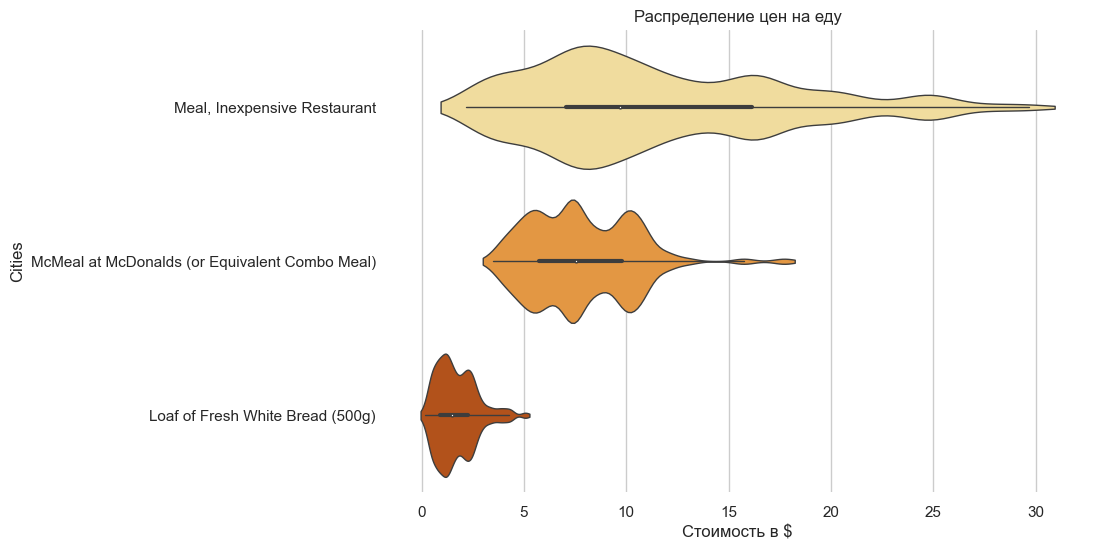

In [229]:
# Построение графика распределения цен на напитки
plt.figure(figsize=(9,6))
sns.violinplot(data=df_selected_food, palette="YlOrBr", orient="h", scale="count", bw=.2, cut=1, linewidth=1)
plt.title('Распределение цен на еду')
plt.xlabel('Стоимость в $')
sns.despine(left=True, bottom=True)
plt.show()

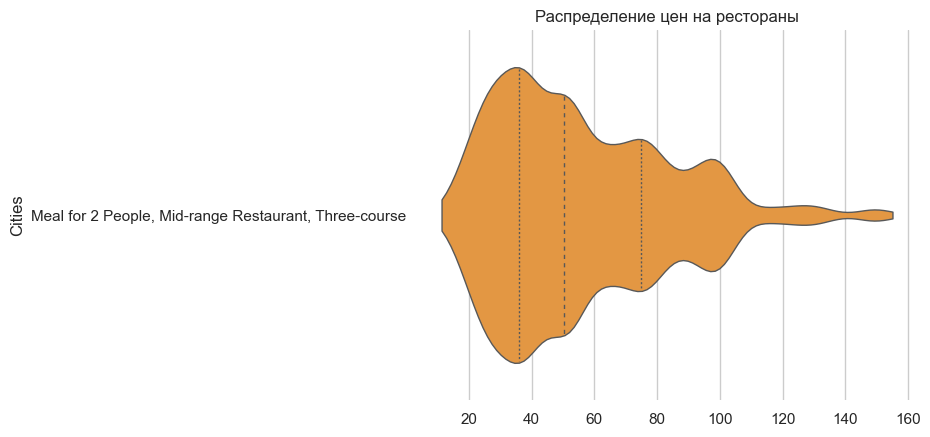

In [230]:
selected_categories = ['Meal for 2 People, Mid-range Restaurant, Three-course']

# Создаем новый DataFrame только с выбранными переменными
df_selected = df_edit[selected_categories]

sns.violinplot(data=df_selected, inner = 'quartile', palette="YlOrBr", orient="h", scale="count", bw=.2, cut=1, linewidth=1)
plt.title('Распределение цен на рестораны')
sns.despine(left=True, bottom=True)
plt.show()

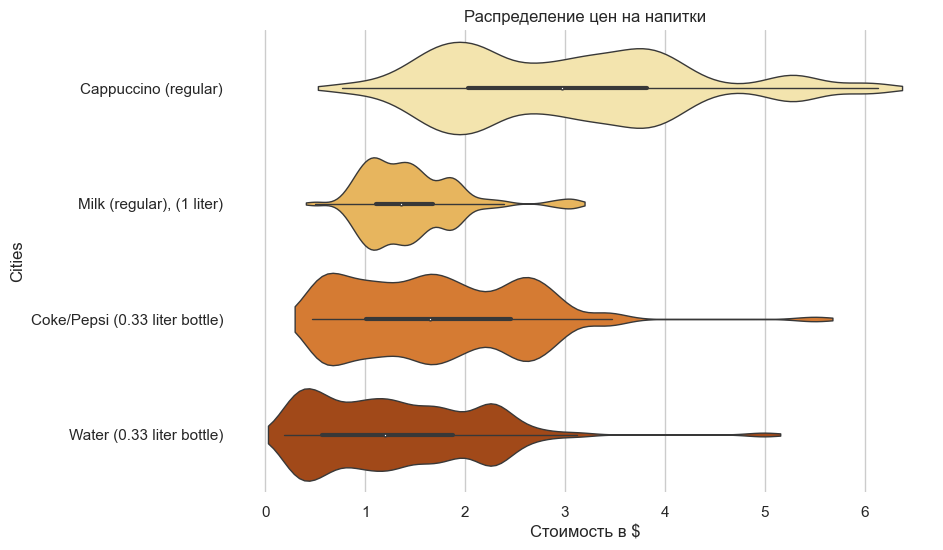

In [231]:
# Построение графика распределения цен на напитки
plt.figure(figsize=(9,6))
sns.violinplot(data=df_selected_drink, palette="YlOrBr", orient="h", scale="count", bw=.2, cut=1, linewidth=1)
plt.title('Распределение цен на напитки')
plt.xlabel('Стоимость в $')
sns.despine(left=True, bottom=True)
plt.show()

Видим, что стоимости напитков колеблются значительно меньше стоимостей еды и уж тем более меньше стоимости похода в хороший ресторан.

## Выводы. 



## Ехать нужно в Чикаго. Там одноврменно высокие зарплаты и доступное жилье.

## P.S. не является инвестиционной рекомендацией, так как при принятии решения о переезде нужно смотреть на такие параметры как состояние экологии, образование и медицина. Все эти параметры в нашем исследовании не рассматривались. 

## P.P.S. Кофе получится купить более-менее везде, потому что цены на него колеблются в разумных пределах.

In [232]:
!pip install streamlit


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [233]:
import streamlit as st